In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

In [2]:
df = pd.read_csv("data/act_table2.csv", index_col = 0)

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,ids,date,activities,activity_level
0,1,2020-02-01 0:00,sleep,sleep
1,1,2020-02-01 1:00,sleep,sleep
2,1,2020-02-01 2:00,sleep,sleep
3,1,2020-02-01 3:00,sleep,sleep
4,1,2020-02-01 4:00,sleep,sleep


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020500 entries, 0 to 1020499
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ids             1020500 non-null  int64 
 1   date            1020500 non-null  object
 2   activities      1020500 non-null  object
 3   activity_level  1020500 non-null  object
dtypes: int64(1), object(3)
memory usage: 38.9+ MB


In [5]:
# transforming date into datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
# converting to days - not hours
df['day'] = df['date'].dt.to_period('D')

In [7]:
df.head()

,ids,date,activities,activity_level,day
0,1,2020-02-01 00:00:00,sleep,sleep,2020-02-01
1,1,2020-02-01 01:00:00,sleep,sleep,2020-02-01
2,1,2020-02-01 02:00:00,sleep,sleep,2020-02-01
3,1,2020-02-01 03:00:00,sleep,sleep,2020-02-01
4,1,2020-02-01 04:00:00,sleep,sleep,2020-02-01


In [8]:
user_experience = df.groupby(["day", "activities", "ids", "activity_level" ]).agg(["count"])

In [9]:
user_experience = user_experience.reset_index()

In [10]:
# daily activities track
user_experience.head(10)

,day,activities,ids,activity_level,date
,,,,,count
0,2020-02-01,Exercise,1,Run,1
1,2020-02-01,Exercise,2,Yoga,1
2,2020-02-01,Exercise,3,Dancing,2
3,2020-02-01,Exercise,4,Dancing,2
4,2020-02-01,Exercise,5,Pilates,1
5,2020-02-01,Exercise,6,Climbing stairs or hills,1
6,2020-02-01,Exercise,7,Stretching exercise,1
7,2020-02-01,Exercise,8,Biking,1
8,2020-02-01,Exercise,9,Run,2


In [11]:
user_experience.columns = ["day", "activities", "User_id", "activity_level", "activity_level count hours"]

In [12]:
user_experience.head()

,day,activities,User_id,activity_level,activity_level count hours
0,2020-02-01,Exercise,1,Run,1
1,2020-02-01,Exercise,2,Yoga,1
2,2020-02-01,Exercise,3,Dancing,2
3,2020-02-01,Exercise,4,Dancing,2
4,2020-02-01,Exercise,5,Pilates,1


In [13]:
df_rec =user_experience.groupby(["User_id","activities","activity_level"]).agg(["sum"])

In [14]:
df_rec = df_rec.reset_index()

In [15]:
df_rec.head()

,User_id,activities,activity_level,activity_level count hours
,,,,sum
0,1,Exercise,Go for a walk,3
1,1,Exercise,Jogging,7
2,1,Exercise,Jump,1
3,1,Exercise,Run,76
4,1,Exercise,Weight lift,7


In [16]:
df_rec.columns = ["User_id", "activities", "activity_level", "total hours"]

In [17]:
df_rec

,User_id,activities,activity_level,total hours
0,1,Exercise,Go for a walk,3
1,1,Exercise,Jogging,7
2,1,Exercise,Jump,1
3,1,Exercise,Run,76
4,1,Exercise,Weight lift,7
...,...,...,...,...
26892,500,Personal activity,prepare lunch,12
26893,500,Work,Answering emails,150
26894,500,Work,Vitual/in-person Meeting,153
26895,500,Work,Work,476


In [18]:
from sklearn import preprocessing

In [19]:
# encoding activities for model
activity = df_rec["activity_level"]
activity.shape

(26897,)

In [20]:
le = preprocessing.LabelEncoder()
le.fit(activity)

result = le.transform(activity)

In [21]:
data = pd.DataFrame({"activity_level" : activity, "code" : result})


In [22]:
data.head()

,activity_level,code
0,Go for a walk,10
1,Jogging,15
2,Jump,16
3,Run,29
4,Weight lift,44


In [23]:
data.shape

(26897, 2)

In [24]:
df_rec["act_encoded"] = data["code"]

In [25]:
df_rec.head()

,User_id,activities,activity_level,total hours,act_encoded
0,1,Exercise,Go for a walk,3,10
1,1,Exercise,Jogging,7,15
2,1,Exercise,Jump,1,16
3,1,Exercise,Run,76,29
4,1,Exercise,Weight lift,7,44


In [26]:
df_model = df_rec[["User_id","act_encoded", "total hours"]].copy()

In [27]:
df_model.head()

,User_id,act_encoded,total hours
0,1,10,3
1,1,15,7
2,1,16,1
3,1,29,76
4,1,44,7


(array([165.,   3.,   2.,   1.,   2.,   1.,   1.,   2.,   3.,   2.]),
 array([1.0000e+00, 2.5280e+02, 5.0460e+02, 7.5640e+02, 1.0082e+03,
        1.2600e+03, 1.5118e+03, 1.7636e+03, 2.0154e+03, 2.2672e+03,
        2.5190e+03]),
 <a list of 10 Patch objects>)

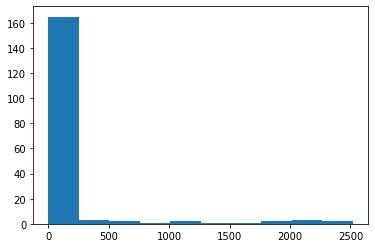

In [28]:
plt.hist(df_model["total hours"].value_counts())

In [29]:
# splitting the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size=0.2, random_state=42)

In [30]:
train.head()

,User_id,act_encoded,total hours
2450,48,46,8
6108,116,2,8
26854,500,32,9
25328,471,37,161
25570,476,7,9


In [31]:
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
#from tensorflow.keras.layers import merge
from tensorflow.keras.layers import Concatenate, Average, Multiply, Dot
from tensorflow.keras.layers import dot
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Dot, Dense, Concatenate


In [32]:
# neural network model - embedding layer
def embedding_input(name,n_in,n_out,reg):
    inp = Input(shape = (1,), dtype = "int64", name = name)
    return inp, Embedding(n_in,n_out,input_length = 1)(inp)

In [33]:
n_users = df_model.User_id.nunique() +1
n_act = df_model.act_encoded.nunique() +1
n_users,n_act
n_factors = 150

In [34]:
n_users

501

In [35]:
user_in, u=embedding_input("user_in", n_users,n_factors, 1e-4)
act_in, m=embedding_input("act_in",n_act,n_factors, 1e-4)
m

<tf.Tensor 'embedding_1/embedding_lookup/Identity_1:0' shape=(?, 1, 150) dtype=float32>

In [36]:
# model
x = Dot(axes=1)([u,m])
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(70, activation = "relu")(x)
x = Dropout(0.3)(x)
x = Dense(1)(x)
nn = Model([user_in,act_in], x)
nn.compile('adam', 'mean_squared_error')

In [37]:
nn.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_in (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
act_in (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 150)       75150       user_in[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 150)       8250        act_in[0][0]                     
__________________________________________________________________________________________________
dot (Dot) 

In [82]:
from tensorflow.keras.models import load_model

if os.path.exists('rec_model5.h5'):
    nn= load_model('rec_model5.h5')
else:
    history = nn.fit([train.User_id, train.act_encoded], train["total hours"], epochs=8, verbose=1)
    nn.save('rec_model5.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [83]:
# MSE test set
nn.evaluate([test.User_id, test.act_encoded], test["total hours"])

5380/5380 [==============================] - 1s 210us/step


91.70829894906083

In [84]:
# predicting test data
predictions = nn.predict([test.User_id, test.act_encoded])

In [85]:
predictions

array([[ 8.671846 ],
       [ 8.424944 ],
       [10.3771305],
       ...,
       [10.970577 ],
       [ 6.643779 ],
       [ 9.144918 ]], dtype=float32)

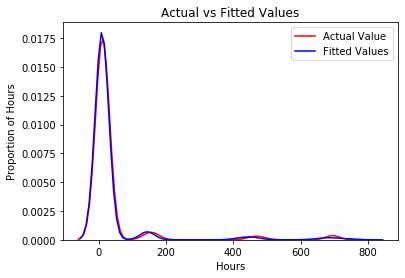

In [86]:
import seaborn as sns
plt.figure()


ax1 = sns.distplot(test["total hours"], hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Hours')
plt.ylabel('Proportion of Hours')

plt.show()
plt.close()

In [105]:
test["predictions"] = predictions
test.head(10)

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,User_id,act_encoded,total hours,predictions
23760,442,52,19,8.671846
26555,494,28,11,8.424944
7708,145,27,6,10.377131
20983,391,12,12,9.784309
23975,446,51,11,9.963156
17577,328,43,14,12.233345
14214,266,21,12,7.347938
21163,394,47,13,10.999983
99,3,9,7,10.717270
2501,49,30,9,6.307901


In [88]:
# Extract embeddings for recommendations 
act_em = nn.get_layer('embedding_1')
act_em_weights = act_em.get_weights()[0]



act_em_weights.shape
act_em_weights

array([[ 0.32911265, -0.04668712,  0.35826385, ...,  0.11551829,
         0.65930134,  0.20734172],
       [ 0.21214941,  0.1825082 ,  0.34646958, ...,  0.723954  ,
        -0.09710777, -0.08968681],
       [ 0.6814618 ,  0.47811615,  0.7158196 , ...,  0.28218678,
         0.26673585,  0.04189865],
       ...,
       [ 0.15846099,  0.22273037,  0.1611868 , ..., -0.18025534,
         0.19942322,  0.2683512 ],
       [ 0.8371385 ,  0.207973  ,  0.78730476, ...,  0.9389568 ,
         0.7998406 ,  0.7653135 ],
       [ 0.37350595,  0.2312423 ,  0.75355136, ...,  0.49557614,
         0.3018484 ,  0.01699317]], dtype=float32)

In [89]:
# normalize embeddings to find cosine similarity between 2 activities
act_em_weights = act_em_weights / np.linalg.norm(act_em_weights, axis = 1).reshape((-1, 1))
act_em_weights[0][:10]
np.sum(np.square(act_em_weights[50]))

0.9999999

In [90]:
act_id_em = df_model["act_encoded"].unique()
len(act_id_em)


54

In [91]:
activity_df = pd.DataFrame(act_em_weights)
activity_df = activity_df.drop(54)

In [92]:
activity_df["act_id"] = act_id_em
activity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,act_id
0,0.057228,-0.008118,0.062297,0.119885,0.152384,0.042313,0.093622,0.085787,0.004924,-0.003983,...,0.001643,0.050422,0.089605,0.130264,0.093543,0.137444,0.020087,0.114644,0.036054,10
1,0.034259,0.029472,0.055950,0.034694,-0.010784,0.039913,0.051659,0.126231,0.158152,-0.023344,...,0.055807,0.114974,0.039846,0.138060,0.012839,0.047174,0.116908,-0.015682,-0.014483,15
2,0.103614,0.072696,0.108838,0.057462,0.048712,-0.007744,0.121654,0.035458,0.132363,0.012037,...,0.113598,0.091075,-0.025931,0.063096,0.037986,-0.028678,0.042906,0.040556,0.006371,16
3,0.008016,0.138535,0.055059,0.081894,0.102434,-0.019646,0.071283,0.042755,0.160928,0.081198,...,0.103580,0.071798,0.068984,0.134393,0.111605,0.040903,0.041385,-0.022572,0.044617,29
4,0.005133,0.069923,0.019131,0.038692,0.036223,0.125561,0.102264,0.129961,0.067711,0.112220,...,0.099505,0.114548,0.093825,0.055580,0.070689,-0.021002,0.003272,0.093089,0.080945,44


In [93]:
df_rec.head()

,User_id,activities,activity_level,total hours,act_encoded
0,1,Exercise,Go for a walk,3,10
1,1,Exercise,Jogging,7,15
2,1,Exercise,Jump,1,16
3,1,Exercise,Run,76,29
4,1,Exercise,Weight lift,7,44


In [94]:
act_names = df_rec[["act_encoded", "activity_level"]].copy()

In [95]:
act_names = act_names.drop_duplicates()

In [96]:
act_names.columns = ["act_id", "activity_level"]

In [97]:
act_df = pd.merge(activity_df, act_names, how = "left")

In [98]:
act_df.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,act_id,activity_level
0,0.057228,-0.008118,0.062297,0.119885,0.152384,0.042313,0.093622,0.085787,0.004924,-0.003983,...,0.050422,0.089605,0.130264,0.093543,0.137444,0.020087,0.114644,0.036054,10,Go for a walk
1,0.034259,0.029472,0.055950,0.034694,-0.010784,0.039913,0.051659,0.126231,0.158152,-0.023344,...,0.114974,0.039846,0.138060,0.012839,0.047174,0.116908,-0.015682,-0.014483,15,Jogging
2,0.103614,0.072696,0.108838,0.057462,0.048712,-0.007744,0.121654,0.035458,0.132363,0.012037,...,0.091075,-0.025931,0.063096,0.037986,-0.028678,0.042906,0.040556,0.006371,16,Jump
3,0.008016,0.138535,0.055059,0.081894,0.102434,-0.019646,0.071283,0.042755,0.160928,0.081198,...,0.071798,0.068984,0.134393,0.111605,0.040903,0.041385,-0.022572,0.044617,29,Run
4,0.005133,0.069923,0.019131,0.038692,0.036223,0.125561,0.102264,0.129961,0.067711,0.112220,...,0.114548,0.093825,0.055580,0.070689,-0.021002,0.003272,0.093089,0.080945,44,Weight lift


In [99]:
def find_similarity_total(act_name):
    """Recommends activities based on the cosine similarity between activities"""
    cosine_list_total = []
    act_name3 = []
    act_name4 = []

    for i in range(0,act_df.shape[0]):
        tent4 = act_df.iloc[i,0:150]
        tent5 = act_df[act_df["activity_level"] == act_name]
        tent6 = tent5.iloc[0,0:150]
        cosine_total = np.dot(tent6,tent4)
        
        act3 = tent5.iloc[0,151]
        act4 = act_df.iloc[i,151]
        cosine_list_total.append(cosine_total)
        act_name3.append(act3)
        act_name4.append(act4)
        
        
    cosine_df_total = pd.DataFrame({"act1" : act_name3, "Recommendation" : act_name4, "Match - cosine similarity" : cosine_list_total})
    cosine_df_total = cosine_df_total.sort_values(by="Match - cosine similarity", ascending = False)
    return cosine_df_total.iloc[1:10,1:]

In [100]:
# recommendation
find_similarity_total("Jogging")

,Recommendation,Match - cosine similarity
49,Biking,0.761697
19,Have lunch,0.748169
34,Watch a movie,0.743361
15,Feed the dog,0.731925
14,Water the plant,0.727215
30,Take a break,0.716912
13,Wash the car,0.714601
9,Fold the cloths,0.714486
4,Weight lift,0.713571


In [104]:
find_similarity_total("Watch a movie")

,Recommendation,Match - cosine similarity
30,Take a break,0.778272
22,Online learning,0.751637
1,Jogging,0.743361
8,Do the laundry,0.738977
17,Have breakfast,0.733064
24,Pick up groceries,0.732838
3,Run,0.730130
11,Sweep the floor,0.729980
14,Water the plant,0.725102
